### Gerando os dados

In [350]:
import numpy as np
from sklearn.metrics import mean_squared_error
from sklearn.neural_network import MLPClassifier, MLPRegressor
import matplotlib.pyplot as plt
from matplotlib import cm
from datetime import datetime
from tensorflow.keras.models import Sequential
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.layers import Input, Dense, Flatten, Dropout, BatchNormalization, Conv2D, MaxPool2D
import tensorflow
from keras.callbacks import TensorBoard
from keras.utils import to_categorical
from sklearn.metrics import mean_squared_error
import matplotlib.cm as cm

np.set_printoptions(suppress=True) # tirar notação científica

In [351]:
def f1x(theta):
    return (theta / 4) * np.cos(theta)

def f1y(theta):
    return (theta / 4) * np.sin(theta)

def f2x(theta):
    return (theta / 4 + 0.8) * np.cos(theta)

def f2y(theta):
    return (theta / 4 + 0.8) * np.sin(theta)

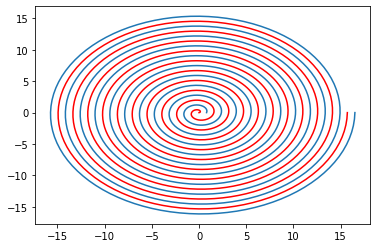

In [352]:
x1 = f1x(np.linspace(0, 20*np.pi, 1000))
y1 = f1y(np.linspace(0, 20*np.pi, 1000))
x2 = f2x(np.linspace(0, 20*np.pi, 1000))
y2 = f2y(np.linspace(0, 20*np.pi, 1000))

plt.plot(x1, y1, color='r')
plt.plot(x2, y2)

### Tamanho pequeno

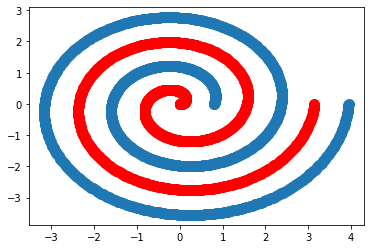

In [362]:
x1sm = f1x(np.linspace(0, 4*np.pi, 1000))
y1sm = f1y(np.linspace(0, 4*np.pi, 1000))
x2sm = f2x(np.linspace(0, 4*np.pi, 1000))
y2sm = f2y(np.linspace(0, 4*np.pi, 1000))

plt.scatter(x1sm, y1sm, color='r', s=100)
plt.scatter(x2sm, y2sm, s=100)

In [365]:
Xsm1 = np.vstack([x1sm,y1sm]).T
Ysm1 = np.zeros(Xsm1.shape[0])

Xsm2 = np.vstack([x2sm,y2sm]).T
Ysm2 = np.ones(Xsm2.shape[0])

X = np.vstack([Xsm1, Xsm2])
Y = to_categorical(np.concatenate([Ysm1, Ysm2]))

### Modelo

In [355]:
def modelo(hidden_layers, input_dim=2, output_dim=2):
    model = Sequential()
    model.add(Input(shape=(input_dim,)))
    for n in hidden_layers:
        model.add(Dense(n, activation='relu'))
        
    model.add(Dense(output_dim, activation='sigmoid'))   
    
    return model

In [155]:
epochs = 1000

try:
    nrun += 1
except:
    nrun = 1
    
tensorboard_callback = TensorBoard(log_dir=f'/tmp/q3/{nrun}')

In [156]:
layers = (8, 8, 8)
modelo1 = modelo(layers)
modelo1.compile(optimizer='sgd', loss='binary_crossentropy', metrics=["accuracy",])
modelo1.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_20 (Dense)             (None, 8)                 24        
_________________________________________________________________
dense_21 (Dense)             (None, 8)                 72        
_________________________________________________________________
dense_22 (Dense)             (None, 8)                 72        
_________________________________________________________________
dense_23 (Dense)             (None, 2)                 18        
Total params: 186
Trainable params: 186
Non-trainable params: 0
_________________________________________________________________


In [157]:
start = datetime.now()
modelo1.fit(X, Y, epochs=epochs, shuffle=True, verbose=0,
               callbacks=[tensorboard_callback])
duration = str(datetime.now() - start).split('.')[0]
print(duration)

0:00:34


In [215]:
def overlay(modelo, X, Y, **kwargs):
    SIZE = kwargs.get('sizeX', 50)
    FIGSIZE = kwargs.get('figsize', None)
    ALPHABG = kwargs.get('alphabg', 0.1)
    ALPHAX  = kwargs.get('alphax' , 0.5)
    
    xstart, xend = np.min(X[:, 0]), np.max(X[:, 0])
    ystart, yend = np.min(X[:, 1]), np.max(X[:, 1])
    
    xo = np.linspace(xstart, xend, 100)
    yo = np.linspace(ystart, yend, 100)

    xo, yo = np.meshgrid(xo, yo)

    Xo = np.vstack([xo.ravel(), yo.ravel()]).T
    Yo = modelo.predict(Xo)
    Yo = np.argmax(Yo, axis=1)
    
    if FIGSIZE:
        plt.figure(figsize=FIGSIZE)
    
    xaxis = X[:, 0]
    yaxis = X[:, 1]
    plt.scatter(xaxis, yaxis, c=np.argmax(Y, axis=1), s=SIZE, alpha=ALPHAX, cmap="cool")
    
    xaxis = Xo[:, 0]
    yaxis = Xo[:, 1]
    plt.scatter(xaxis, yaxis, c=Yo, alpha=ALPHABG)
    

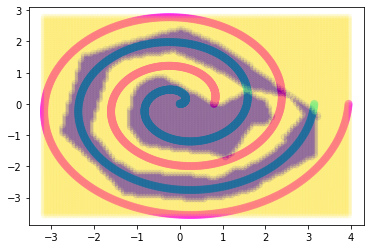

In [195]:
overlay(modelo1, X, Y)

### Tamanho médio

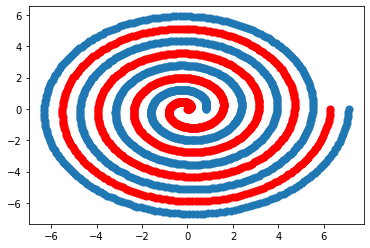

In [147]:
x1md = f1x(np.linspace(0, 8*np.pi, 1000))
y1md = f1y(np.linspace(0, 8*np.pi, 1000))
x2md = f2x(np.linspace(0, 8*np.pi, 1000))
y2md = f2y(np.linspace(0, 8*np.pi, 1000))

plt.scatter(x1md, y1md, color='r', s=50)
plt.scatter(x2md, y2md, s=50)

In [181]:
Xmd1 = np.vstack([x1md,y1md]).T
Ymd1 = np.zeros(Xmd1.shape[0])

Xmd2 = np.vstack([x2md,y2md]).T
Ymd2 = np.ones(Xmd2.shape[0])

Xmd = np.vstack([Xmd1, Xmd2])
Ymd = to_categorical(np.concatenate([Ymd1, Ymd2]))

In [183]:
epochs = 1000

try:
    nrun += 1
except:
    nrun = 1
    
tensorboard_callback = TensorBoard(log_dir=f'/tmp/q3/{nrun}')

In [184]:
layers = (8, 8, 8)
modelo2 = modelo(layers)
modelo2.compile(optimizer='sgd', loss='binary_crossentropy', metrics=["accuracy",])
modelo2.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_24 (Dense)             (None, 8)                 24        
_________________________________________________________________
dense_25 (Dense)             (None, 8)                 72        
_________________________________________________________________
dense_26 (Dense)             (None, 8)                 72        
_________________________________________________________________
dense_27 (Dense)             (None, 2)                 18        
Total params: 186
Trainable params: 186
Non-trainable params: 0
_________________________________________________________________


In [185]:
start = datetime.now()
epochs = 1000
modelo2.fit(Xmd, Ymd, epochs=epochs, shuffle=True, verbose=0,
               callbacks=[tensorboard_callback])
duration = str(datetime.now() - start).split('.')[0]
print(duration)

0:00:33


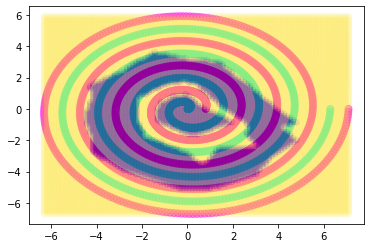

In [196]:
overlay(modelo2, Xmd, Ymd)

0:00:38


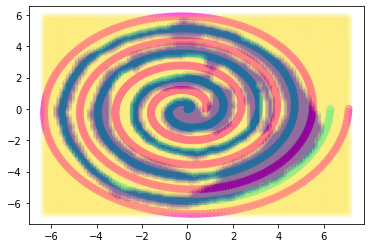

In [197]:
nrun += 1
epochs = 1000
tensorboard_callback = TensorBoard(log_dir=f'/tmp/q3/{nrun}')
layers = (16, 16, 16, 8, 8, 8)
modelo3 = modelo(layers)
modelo3.compile(optimizer='sgd', loss='binary_crossentropy', metrics=["accuracy",])

start = datetime.now()
modelo3.fit(Xmd, Ymd, epochs=epochs, shuffle=True, verbose=0,
               callbacks=[tensorboard_callback])
duration = str(datetime.now() - start).split('.')[0]
print(duration)

overlay(modelo3, Xmd, Ymd)

### Tamanho total

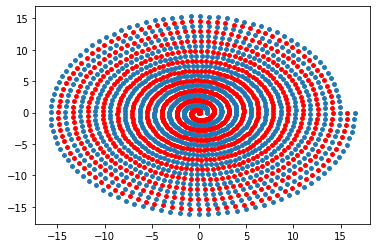

In [356]:
x1bg = f1x(np.linspace(0, 20*np.pi, 1000))
y1bg = f1y(np.linspace(0, 20*np.pi, 1000))
x2bg = f2x(np.linspace(0, 20*np.pi, 1000))
y2bg = f2y(np.linspace(0, 20*np.pi, 1000))

plt.scatter(x1bg, y1bg, color='r', s=15)
plt.scatter(x2bg, y2bg, s=15)

In [357]:
Xgb1 = np.vstack([x1bg,y1bg]).T
Ygb1 = np.zeros(Xgb1.shape[0])

Xbg2 = np.vstack([x2bg,y2bg]).T
Ybg2 = np.ones(Xbg2.shape[0])

Xbg = np.vstack([Xgb1, Xbg2])
Ybg = to_categorical(np.concatenate([Ygb1, Ybg2]))

0:00:38


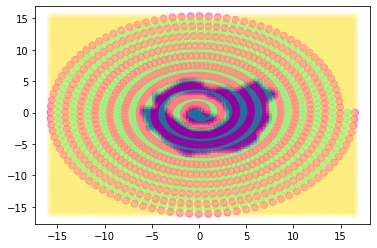

In [203]:
nrun += 1
epochs = 1000
tensorboard_callback = TensorBoard(log_dir=f'/tmp/q3/{nrun}')
layers = (16, 16, 16, 8, 8, 8)
modelo4 = modelo(layers)
modelo4.compile(optimizer='sgd', loss='binary_crossentropy', metrics=["accuracy",])

start = datetime.now()
modelo4.fit(Xbg, Ybg, epochs=epochs, shuffle=True, verbose=0,
               callbacks=[tensorboard_callback])
duration = str(datetime.now() - start).split('.')[0]
print(duration)

overlay(modelo4, Xbg, Ybg)

0:01:32


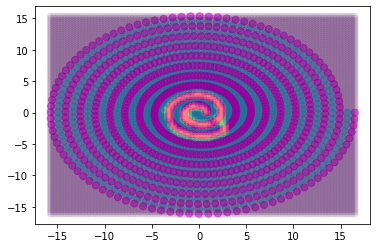

In [205]:
nrun += 1
epochs = 2000
tensorboard_callback = TensorBoard(log_dir=f'/tmp/q3/{nrun}')
layers = (32, 32, 32, 16, 16, 16, 8, 8, 8)
modelo5 = modelo(layers)
modelo5.compile(optimizer='sgd', loss='binary_crossentropy', metrics=["accuracy",])

start = datetime.now()
modelo5.fit(Xbg, Ybg, epochs=epochs, shuffle=True, verbose=0,
               callbacks=[tensorboard_callback])
duration = str(datetime.now() - start).split('.')[0]
print(duration)

overlay(modelo5, Xbg, Ybg)

0:01:44


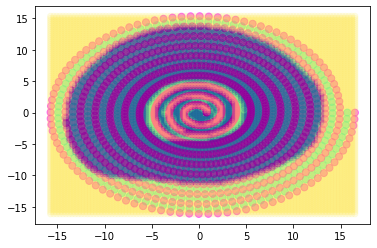

In [206]:
nrun += 1
epochs = 2000
tensorboard_callback = TensorBoard(log_dir=f'/tmp/q3/{nrun}')
layers = (64, 64, 64, 32, 32, 32, 16, 16, 16, 8, 8, 8)
modelo6 = modelo(layers)
modelo6.compile(optimizer='sgd', loss='binary_crossentropy', metrics=["accuracy",])

start = datetime.now()
modelo6.fit(Xbg, Ybg, epochs=epochs, shuffle=True, verbose=0,
               callbacks=[tensorboard_callback])
duration = str(datetime.now() - start).split('.')[0]
print(duration)

overlay(modelo6, Xbg, Ybg)

0:04:05


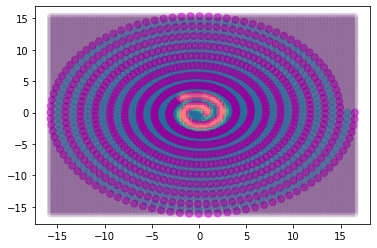

In [207]:
nrun += 1
epochs = 2000
tensorboard_callback = TensorBoard(log_dir=f'/tmp/q3/{nrun}')
layers = (512, 256, 128, 64, 64, 64, 32, 32, 32, 16, 16, 16, 8, 8, 8)
modelo7 = modelo(layers)
modelo7.compile(optimizer='sgd', loss='binary_crossentropy', metrics=["accuracy",])

start = datetime.now()
modelo7.fit(Xbg, Ybg, epochs=epochs, shuffle=True, verbose=0,
               callbacks=[tensorboard_callback])
duration = str(datetime.now() - start).split('.')[0]
print(duration)

overlay(modelo7, Xbg, Ybg)

0:07:21


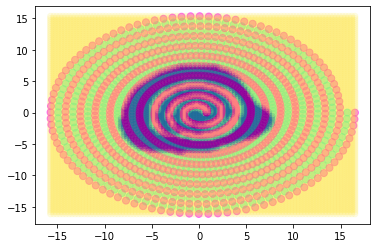

In [208]:
nrun += 1
epochs = 2000
tensorboard_callback = TensorBoard(log_dir=f'/tmp/q3/{nrun}')
layers = (512, 512, 512, 8, 8, 8)
modelo8 = modelo(layers)
modelo8.compile(optimizer='sgd', loss='binary_crossentropy', metrics=["accuracy",])

start = datetime.now()
modelo8.fit(Xbg, Ybg, epochs=epochs, shuffle=True, verbose=0,
               callbacks=[tensorboard_callback])
duration = str(datetime.now() - start).split('.')[0]
print(duration)

overlay(modelo8, Xbg, Ybg)

0:05:27


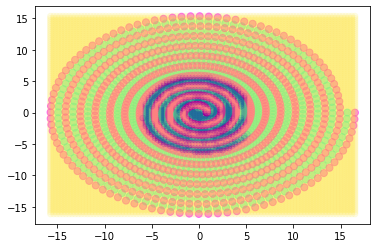

In [211]:
nrun += 1
epochs = 2000
tensorboard_callback = TensorBoard(log_dir=f'/tmp/q3/{nrun}')
layers = (512, 512, 128, 128, 32, 32, 8, 8, 8)
modelo9 = modelo(layers)
modelo9.compile(optimizer='sgd', loss='binary_crossentropy', metrics=["accuracy",])

start = datetime.now()
modelo9.fit(Xbg, Ybg, epochs=epochs, shuffle=True, verbose=0,
               callbacks=[tensorboard_callback])
duration = str(datetime.now() - start).split('.')[0]
print(duration)

overlay(modelo9, Xbg, Ybg)

### Melhor resultado

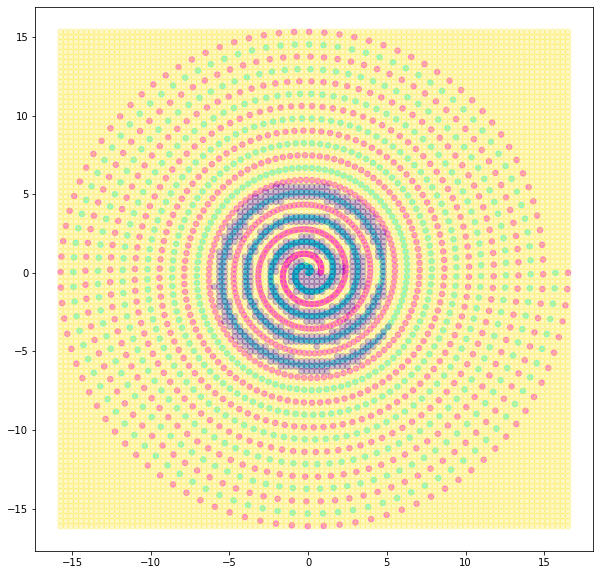

In [219]:
overlay(modelo9, Xbg, Ybg, sizeX=30, figsize=(10, 10), alphabg=0.25)

### Testando coordenadas polares

In [252]:
R = np.sqrt(np.sum(Xbg**2, axis=1))
T = np.nan_to_num(np.arctan(Xbg[:, 1] / Xbg[:, 0]))
Xbgpolar = np.vstack([R, T]).T

<ipython-input-252-ea11d814108f>:2: RuntimeWarning: invalid value encountered in true_divide
  T = np.nan_to_num(np.arctan(Xbg[:, 1] / Xbg[:, 0]))


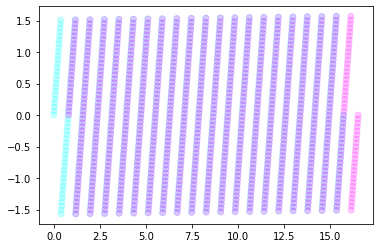

In [327]:
plt.scatter(R, T, c=np.argmax(Ybg, axis=1), alpha=0.2, cmap="cool")

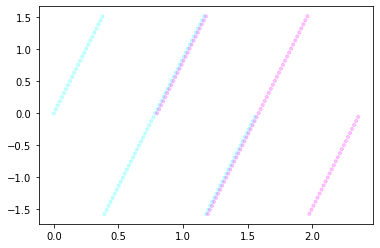

In [325]:
d = 100
t1 = np.concatenate([R  [:d], R  [1000:1000 + d]])
t2 = np.concatenate([T  [:d], T  [1000:1000 + d]])
t3 = np.concatenate([Ybg[:d], Ybg[1000:1000 + d]])
plt.scatter(t1, t2, c=np.argmax(t3, axis=1), alpha=0.2, cmap="cool", s=10)

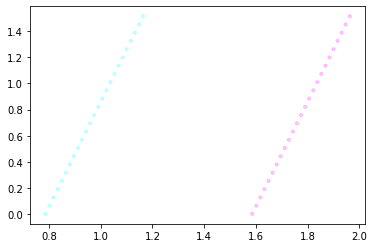

In [324]:
d = 75
t1 = np.concatenate([R  [50:d], R  [1050:1000 + d]])
t2 = np.concatenate([T  [50:d], T  [1050:1000 + d]])
t3 = np.concatenate([Ybg[50:d], Ybg[1050:1000 + d]])
plt.scatter(t1, t2, c=np.argmax(t3, axis=1), alpha=0.2, cmap="cool", s=10)

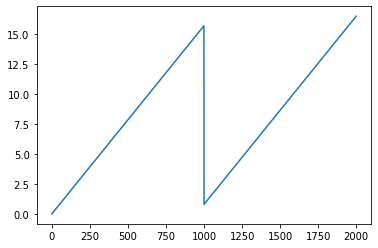

In [256]:
plt.plot(R)

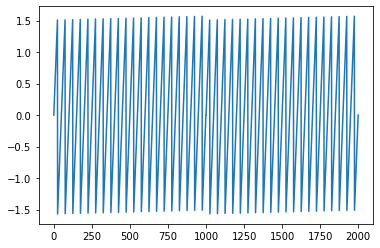

In [257]:
plt.plot(T)

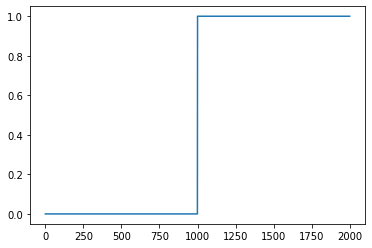

In [264]:
plt.plot(np.argmax(Ybg, axis=1))

### Legenda

8: 8x8x8 2 voltas

9: 8x8x8 4 voltas

10: 16x16x16x8x8x8 4 voltas

11: 16x16x16x8x8x8 10 voltas

12: 32x32x32x16x16x16x8x8x8 10 voltas

13: "" 2k épocas

14: 64x64x64x32x32x32x16x16x16x8x8x8 10 voltas 2k épocas

15: 512x256x128x64x64x64x32x32x32x16x16x16x8x8x8 10 voltas 2k épocas

16: 512x512x512x8x8x8 10 voltas 2k épocas

17: 512x512x128x128x32x32x8x8x8 10 voltas 2k épocas

### SVM

In [370]:
from sklearn import svm
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

In [342]:
def overlay(modelo, X, Y, **kwargs):
    SIZE = kwargs.get('sizeX', 50)
    FIGSIZE = kwargs.get('figsize', None)
    ALPHABG = kwargs.get('alphabg', 0.1)
    ALPHAX  = kwargs.get('alphax' , 0.5)
    
    xstart, xend = np.min(X[:, 0]), np.max(X[:, 0])
    ystart, yend = np.min(X[:, 1]), np.max(X[:, 1])
    
    xo = np.linspace(xstart, xend, 100)
    yo = np.linspace(ystart, yend, 100)

    xo, yo = np.meshgrid(xo, yo)

    Xo = np.vstack([xo.ravel(), yo.ravel()]).T
    Yo = modelo.predict(Xo)
    
    if FIGSIZE:
        plt.figure(figsize=FIGSIZE)
    
    xaxis = X[:, 0]
    yaxis = X[:, 1]
    plt.scatter(xaxis, yaxis, c=Y, s=SIZE, alpha=ALPHAX, cmap="cool")
    
    xaxis = Xo[:, 0]
    yaxis = Xo[:, 1]
    plt.scatter(xaxis, yaxis, c=Yo, alpha=ALPHABG)
    

In [397]:
Ysm_1dim = np.concatenate([Ysm1, Ysm2])
Ymd_1dim = np.concatenate([Ymd1, Ymd2])
Ybg_1dim = np.concatenate([Ygb1, Ybg2])

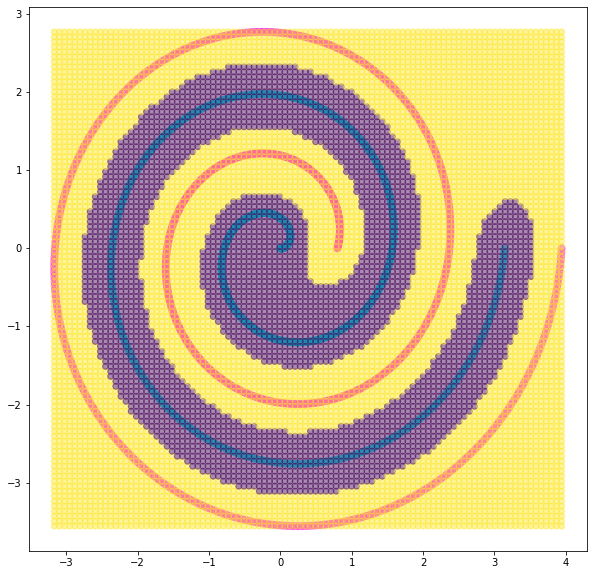

In [400]:
clfsm2 = svm.SVC(kernel='rbf', gamma=3)
clfsm2.fit(Xsm, Ysm_1dim)
overlay(clfsm2, Xsm, Ysm_1dim, figsize=(10,10), alphabg=0.45)

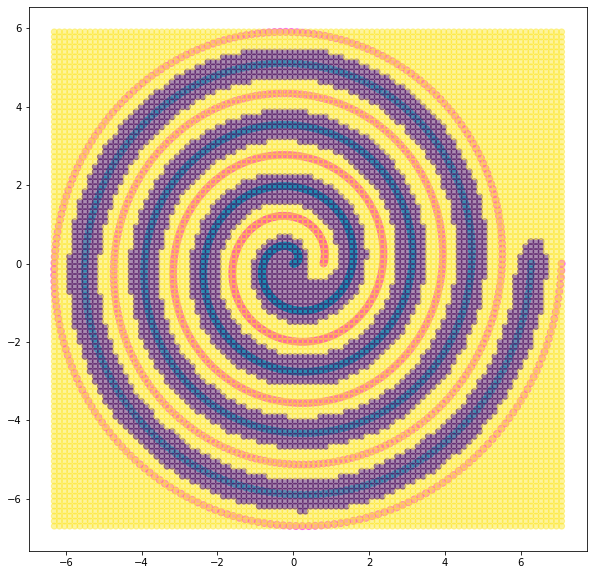

In [399]:
clfsm1 = svm.SVC(kernel='rbf', gamma=3)
clfsm1.fit(Xmd, Ymd_1dim)
overlay(clfsm1, Xmd, Ymd_1dim, figsize=(10,10), alphabg=0.45)

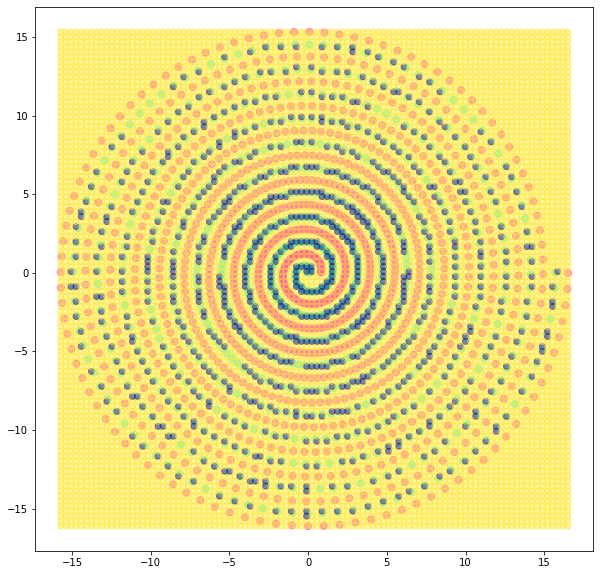

In [401]:
clf = svm.SVC(kernel='rbf', gamma=100)
clf.fit(Xbg, Ybg_1dim)
overlay(clf, Xbg, Ybg_1dim, figsize=(10,10), alphabg=0.45)

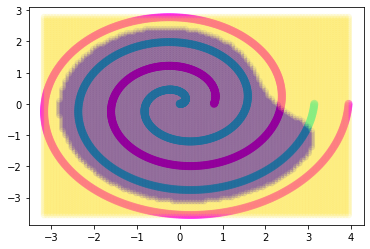

In [368]:
overlay(clfsm, Xsm, Ysm_1dim)